<a href="https://www.kaggle.com/code/julicinho/king-county?scriptVersionId=155989165" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd



Importamos Librerias

In [2]:
import numpy as np
import pandas as pd
from tabulate import tabulate

In [3]:
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

In [4]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

In [6]:
#!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

In [7]:
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

In [8]:
!pip install fitter

In [9]:
# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
from fitter import Fitter, get_common_distributions

In [10]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

In [11]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

Base de Datos

In [12]:
# Ruta del archivo CSV en Kaggle
csv_file_path = '/kaggle/input/housesalesprediction/kc_house_data.csv'

# Cargar el DataFrame desde el archivo CSV
df = pd.read_csv(csv_file_path)
print(df)

               id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242   

In [13]:
print('Estructura del data set ->', df.shape)

Estructura del data set -> (21613, 21)


In [14]:
print('Nombre de las columnas del data set',df.columns)

Nombre de las columnas del data set Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


El significado de cada columna:

id--> ID para cada vivienda vendida.

date--> Fecha en que se vendió la vivienda.

price--> Precio de cada vivienda vendida.

bedrooms-->Numero de habitaciones.

bathrooms-->Number de baños, donde .5 implica una habitación con baño pero sin ducha.

sqft_living--> Área del interior del departamento (pies^2).

sqft_lot--> Área del terreno (pies^2).

floors-->Number de pisos.

waterfront-->Variable que indica si la vivienda tiene vista al paseo marítimo.

view-->Un índice del 0 al 4, que indica que tan buena es la vista de la propiedad.

condition-->Un índice del 1 al5 que índica la condición de la vivienda.

grade--> Un índice del 1 al 13, donde 1-3 tiene el nivel más bajo de construcción y diseño, 7 tiene un nivel medio de construcción y diseño, y 11-13 tiene el nivel más alto de construcción y diseño.

sqft_above--> Área del interior de la vivienda, que se encuentra sobre el nivel del mar (pies^2).

sqft_basement--> Área del interior de la vivienda, que se encuentra por debajo del nivel del mar (pies^2).

yr_built--> Año en que se construyó inicialmente la vivienda.

yr_renovated--> Año en que se renovó por última vez la vivienda.

zipcode--> Código postal de la vivienda.

lat--> Latitud.

long--> Longitud.

sqft_living15--> Área promedio del interior de la vivienda de las 15 casas mas próximas (pies^2).

sqft_lot15--> Área promedio del terreno, de los 15 terrenos más próximos (pies^2).

In [15]:
# Se renombran las columnas para que sean más descriptivas
df.columns = ["id", "Fecha", "Precio", "no_habitaciones",
                 "no_baños", "m2_habitables", "m2_Tot",
                 "no_pisos", "Vistaalmar", "Indice_vista",'Condicion', 'Calidad', "m2_snm", "m2_bnm",
                 "yr_construccion", "yr_remodelacion",'CP','Latitud','Longitud',
                'm2_15viviendas','m2_15lotes']

Análisis Exploratorio

convertimos las columnas que están en las unidades de pies cuadrados a metros cuadrados

In [16]:
pie_a_metro =0.3048
print(  df["m2_habitables"].head(5) )
df["m2_habitables"]=df["m2_habitables"]*(pie_a_metro)*(pie_a_metro)
print(  df["m2_habitables"].head(5) )

0    1180
1    2570
2     770
3    1960
4    1680
Name: m2_habitables, dtype: int64
0    109.625587
1    238.760813
2     71.535341
3    182.089958
4    156.077107
Name: m2_habitables, dtype: float64


In [17]:
df["m2_Tot"]=df["m2_Tot"]*(pie_a_metro)*(pie_a_metro)

df["m2_bnm"]=df["m2_bnm"]*(pie_a_metro)*(pie_a_metro)

df["m2_snm"]=df["m2_snm"]*(pie_a_metro)*(pie_a_metro)
df['m2_15viviendas']=df['m2_15viviendas']*(pie_a_metro)*(pie_a_metro)
df['m2_15lotes']=df['m2_15lotes']*(pie_a_metro)*(pie_a_metro)

In [18]:
df.head(3)

,id,Fecha,Precio,no_habitaciones,no_baños,m2_habitables,m2_Tot,no_pisos,Vistaalmar,Indice_vista,...,Calidad,m2_snm,m2_bnm,yr_construccion,yr_remodelacion,CP,Latitud,Longitud,m2_15viviendas,m2_15lotes
0,7129300520,20141013T000000,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,...,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176
1,6414100192,20141209T000000,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,...,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323
2,5631500400,20150225T000000,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,...,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21613 non-null  int64  
 1   Fecha            21613 non-null  object 
 2   Precio           21613 non-null  float64
 3   no_habitaciones  21613 non-null  int64  
 4   no_baños         21613 non-null  float64
 5   m2_habitables    21613 non-null  float64
 6   m2_Tot           21613 non-null  float64
 7   no_pisos         21613 non-null  float64
 8   Vistaalmar       21613 non-null  int64  
 9   Indice_vista     21613 non-null  int64  
 10  Condicion        21613 non-null  int64  
 11  Calidad          21613 non-null  int64  
 12  m2_snm           21613 non-null  float64
 13  m2_bnm           21613 non-null  float64
 14  yr_construccion  21613 non-null  int64  
 15  yr_remodelacion  21613 non-null  int64  
 16  CP               21613 non-null  int64  
 17  Latitud     

In [20]:
df['no_pisos'].head(10)
df['no_pisos']=df['no_pisos'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21613 non-null  int64  
 1   Fecha            21613 non-null  object 
 2   Precio           21613 non-null  float64
 3   no_habitaciones  21613 non-null  int64  
 4   no_baños         21613 non-null  float64
 5   m2_habitables    21613 non-null  float64
 6   m2_Tot           21613 non-null  float64
 7   no_pisos         21613 non-null  int64  
 8   Vistaalmar       21613 non-null  int64  
 9   Indice_vista     21613 non-null  int64  
 10  Condicion        21613 non-null  int64  
 11  Calidad          21613 non-null  int64  
 12  m2_snm           21613 non-null  float64
 13  m2_bnm           21613 non-null  float64
 14  yr_construccion  21613 non-null  int64  
 15  yr_remodelacion  21613 non-null  int64  
 16  CP               21613 non-null  int64  
 17  Latitud     

Creamos una columna para las habitaciones con baño.

In [21]:
df.insert(5, 'Habitacion_baño','Habconbaño', allow_duplicates=False)

In [22]:
df['Habitacion_baño'].head()

0    Habconbaño
1    Habconbaño
2    Habconbaño
3    Habconbaño
4    Habconbaño
Name: Habitacion_baño, dtype: object

In [23]:
max=df.shape[0]

j=0
for i in df['no_baños']:
  a=i-int(i)
  if (a==0.5 ):
    df['Habitacion_baño'][j]=df['Habitacion_baño'][j].replace('Habconbaño', 'si')
  else:
    df['Habitacion_baño'][j]=df['Habitacion_baño'][j].replace('Habconbaño', 'no')
  j=j+1

In [24]:
df['no_baños'].head(5)
df['no_baños']=df['no_baños'].astype(int)
df['no_baños'].head(20)

0     1
1     2
2     1
3     3
4     2
5     4
6     2
7     1
8     1
9     2
10    2
11    1
12    1
13    1
14    2
15    3
16    2
17    1
18    1
19    1
Name: no_baños, dtype: int64

Acomodamos el formato de la columna fecha

In [25]:
import datetime as dt
df['Fecha']=pd.to_datetime(df['Fecha'])
df.Fecha.unique
print('-----------')
df['Fecha']=df['Fecha'].dt.strftime('%Y-%m')

-----------


In [26]:
df.Fecha.value_counts()

Fecha
2015-04    2231
2014-07    2211
2014-06    2180
2014-08    1940
2014-10    1878
2015-03    1875
2014-09    1774
2014-05    1768
2014-12    1471
2014-11    1411
2015-02    1250
2015-01     978
2015-05     646
Name: count, dtype: int64

In [27]:
len(df.Fecha.unique())

13

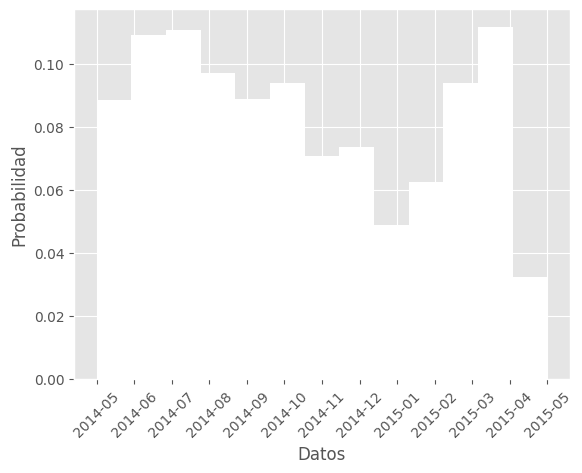

In [28]:
plt.hist(df.Fecha.sort_values(),13, density=True, facecolor='w')
plt.xlabel("Datos")
plt.xticks(rotation=45)
plt.grid(True)
plt.ylabel("Probabilidad")
plt.show()

Dimensión de la base de datos.

In [29]:
df.shape

(21613, 22)

In [30]:
df.isna().sum().sort_values()

id                 0
Longitud           0
Latitud            0
CP                 0
yr_remodelacion    0
yr_construccion    0
m2_bnm             0
m2_snm             0
Calidad            0
Condicion          0
Indice_vista       0
Vistaalmar         0
no_pisos           0
m2_Tot             0
m2_habitables      0
Habitacion_baño    0
no_baños           0
no_habitaciones    0
Precio             0
Fecha              0
m2_15viviendas     0
m2_15lotes         0
dtype: int64

Existen varias librerías en python que permiten identificar a qué distribución se ajustan mejor los datos, una de ellas es fitter. Esta librería permite ajustar cualquiera de las 80 distribuciones implementadas en scipy.

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
cauchy,1.746704e-12,3754.968523,3770.930624,inf,0.137688,0.000000e+00
logistic,1.866886e-12,6685.764681,6701.726781,inf,0.107385,1.711580e-217
norm,3.909172e-12,14658.914100,14674.876201,inf,0.145727,0.000000e+00


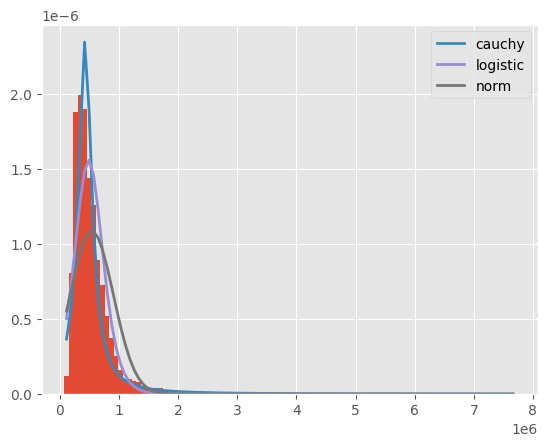

In [31]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df.Precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=3)

La distribución es asimétrica con una cola positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media.

Variables numéricas

In [32]:
df.select_dtypes(include=['float64','int'])

,id,Precio,no_habitaciones,no_baños,m2_habitables,m2_Tot,no_pisos,Vistaalmar,Indice_vista,Condicion,Calidad,m2_snm,m2_bnm,yr_construccion,yr_remodelacion,CP,Latitud,Longitud,m2_15viviendas,m2_15lotes
0,7129300520,221900.0,3,1,109.625587,524.902176,1,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176
1,6414100192,538000.0,3,2,238.760813,672.803816,2,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323
2,5631500400,180000.0,2,1,71.535341,929.030400,1,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308
3,2487200875,604000.0,4,3,182.089958,464.515200,1,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200
4,1954400510,510000.0,3,2,156.077107,750.656563,1,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2,142.141651,105.073338,3,0,0,3,8,142.141651,0.000000,2009,0,98103,47.6993,-122.346,142.141651,140.190687
21609,6600060120,400000.0,4,2,214.606022,540.045372,2,0,0,3,8,214.606022,0.000000,2014,0,98146,47.5107,-122.362,170.012563,668.901888
21610,1523300141,402101.0,2,0,94.761101,125.419104,2,0,0,3,7,94.761101,0.000000,2009,0,98144,47.5944,-122.299,94.761101,186.456401
21611,291310100,400000.0,3,2,148.644864,221.852460,2,0,0,3,8,148.644864,0.000000,2004,0,98027,47.5345,-122.069,130.993286,119.566212


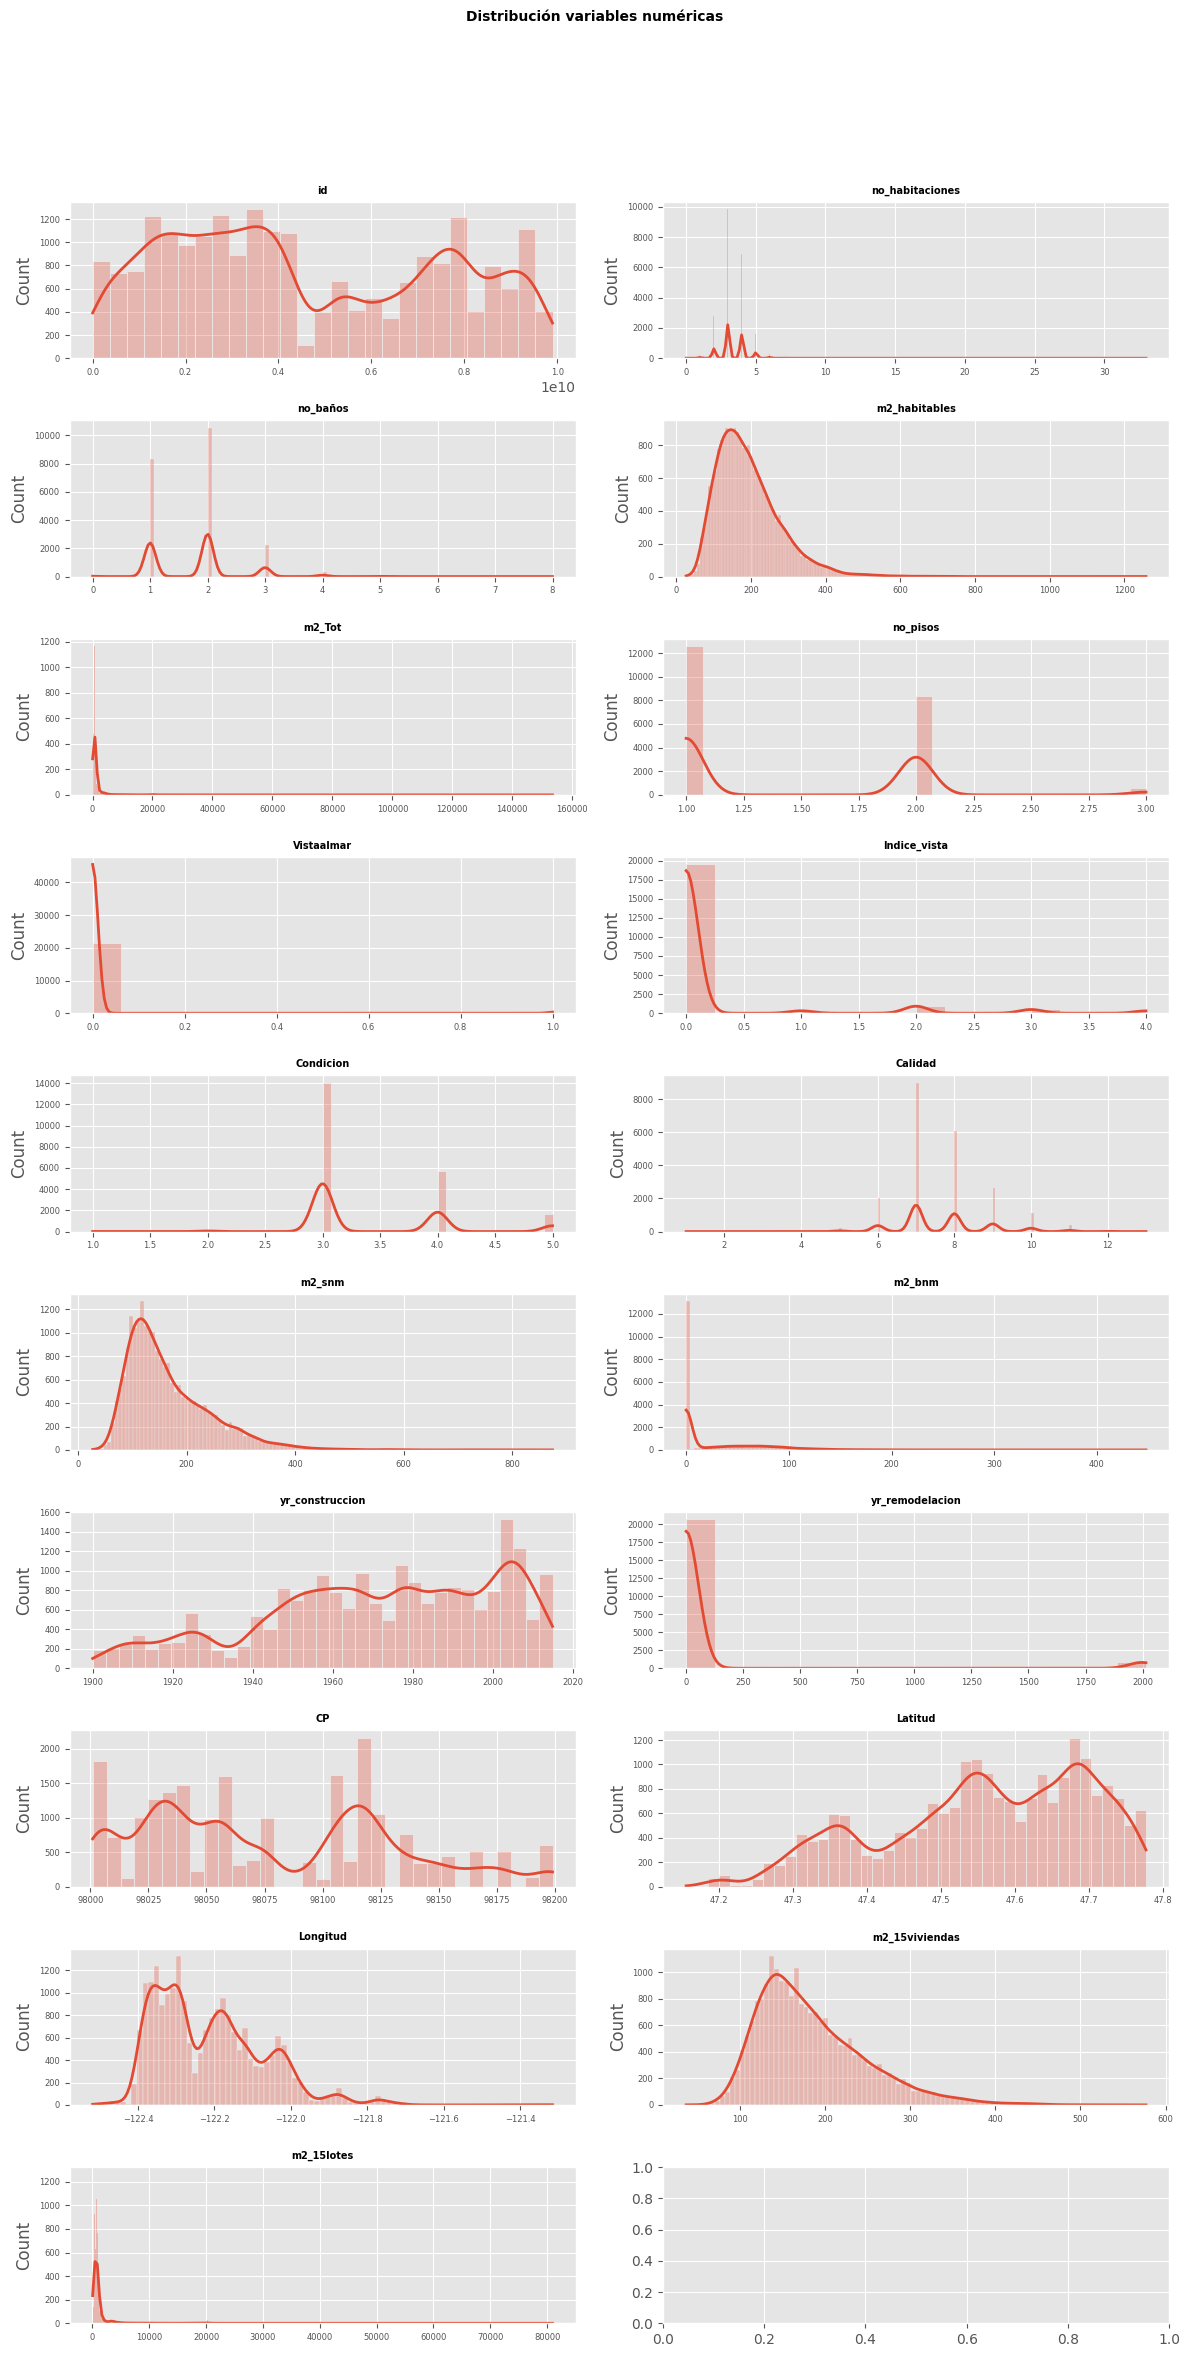

In [33]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12, 24))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Precio')


for i, colum in enumerate(columnas_numeric):
    #print('i',i)
    #print('colum',interesa predecircolum)
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        #color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
        )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [34]:
columnas_numeric

Index(['id', 'no_habitaciones', 'no_baños', 'm2_habitables', 'm2_Tot',
       'no_pisos', 'Vistaalmar', 'Indice_vista', 'Condicion', 'Calidad',
       'm2_snm', 'm2_bnm', 'yr_construccion', 'yr_remodelacion', 'CP',
       'Latitud', 'Longitud', 'm2_15viviendas', 'm2_15lotes'],
      dtype='object')

Reclasificamos la variable Calidad

In [35]:
print(df.Calidad.value_counts())

#1-5 construccion de baja calida_1
# 6 por debajo del nivel medio
# 7 nivel medio de construccion
# 8 por encima del nivel medio
# >8 Alto nivel

print('modificacion')

#esta variable se podria reclasificar, calidad de construccion y diseño
#1-5 construccion de baja calida_1
# 6 por debajo del nivel medio
# 7 nivel medio de construccion
# 8 por encima del nivel medio
# >8 Alto nivel

df.Calidad=df.Calidad.replace([1,2,3,4,5], 'Minima')
df.Calidad=df.Calidad.replace([6], 'No tan buena')
df.Calidad=df.Calidad.replace([7], 'Buena')
df.Calidad=df.Calidad.replace([8], 'Muy buena')
df.Calidad=df.Calidad.replace([9,10,11,12,13], 'Excelente')

print(df.Calidad.value_counts())

Calidad
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64
modificacion
Calidad
Buena           8981
Muy buena       6068
Excelente       4251
No tan buena    2038
Minima           275
Name: count, dtype: int64


Reclasificamos la variable Condition

In [36]:
df.Condicion.value_counts()

Condicion
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

In [37]:
print('modificacion')

df.Condicion=df.Condicion.replace([1], 'Minima')
df.Condicion=df.Condicion.replace([2], 'No tan buena')
df.Condicion=df.Condicion.replace([3], 'Buena')
df.Condicion=df.Condicion.replace([4], 'Muy buena')
df.Condicion=df.Condicion.replace([5], 'Excelente')

print(df.Condicion.value_counts())

modificacion
Condicion
Buena           14031
Muy buena        5679
Excelente        1701
No tan buena      172
Minima             30
Name: count, dtype: int64


In [38]:
df.Vistaalmar.value_counts()
df.Vistaalmar=df.Vistaalmar.astype(str)

df.Vistaalmar=df.Vistaalmar.replace('1', 'Si')
df.Vistaalmar=df.Vistaalmar.replace('0', 'No')

df.info()
#como solo tiene dos valores, convertimos a tipo str

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21613 non-null  int64  
 1   Fecha            21613 non-null  object 
 2   Precio           21613 non-null  float64
 3   no_habitaciones  21613 non-null  int64  
 4   no_baños         21613 non-null  int64  
 5   Habitacion_baño  21613 non-null  object 
 6   m2_habitables    21613 non-null  float64
 7   m2_Tot           21613 non-null  float64
 8   no_pisos         21613 non-null  int64  
 9   Vistaalmar       21613 non-null  object 
 10  Indice_vista     21613 non-null  int64  
 11  Condicion        21613 non-null  object 
 12  Calidad          21613 non-null  object 
 13  m2_snm           21613 non-null  float64
 14  m2_bnm           21613 non-null  float64
 15  yr_construccion  21613 non-null  int64  
 16  yr_remodelacion  21613 non-null  int64  
 17  CP          

In [39]:
df.m2_15lotes.value_counts()

m2_15lotes
464.515200     427
371.612160     357
557.418240     289
668.901888     211
445.934592     145
              ... 
2408.697118      1
3339.213967      1
474.455825       1
140.655203       1
186.456401       1
Name: count, Length: 8689, dtype: int64

In [40]:
df.yr_remodelacion.value_counts()
# El valor 0, no da informacion sobre si fue remodelada (o no) la casa. Quitamos esa columna.

df = df.drop(columns=['yr_remodelacion'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21613 non-null  int64  
 1   Fecha            21613 non-null  object 
 2   Precio           21613 non-null  float64
 3   no_habitaciones  21613 non-null  int64  
 4   no_baños         21613 non-null  int64  
 5   Habitacion_baño  21613 non-null  object 
 6   m2_habitables    21613 non-null  float64
 7   m2_Tot           21613 non-null  float64
 8   no_pisos         21613 non-null  int64  
 9   Vistaalmar       21613 non-null  object 
 10  Indice_vista     21613 non-null  int64  
 11  Condicion        21613 non-null  object 
 12  Calidad          21613 non-null  object 
 13  m2_snm           21613 non-null  float64
 14  m2_bnm           21613 non-null  float64
 15  yr_construccion  21613 non-null  int64  
 16  CP               21613 non-null  int64  
 17  Latitud     

Nuestro objetivo es predecir el precio de las viviendas, analizamos cada variable en relación a la variable respuesta precio. Entonces a partir de esto, se pueden empezar a extraer ideas sobre qué variables están más relacionadas con el precio y de qué forma.

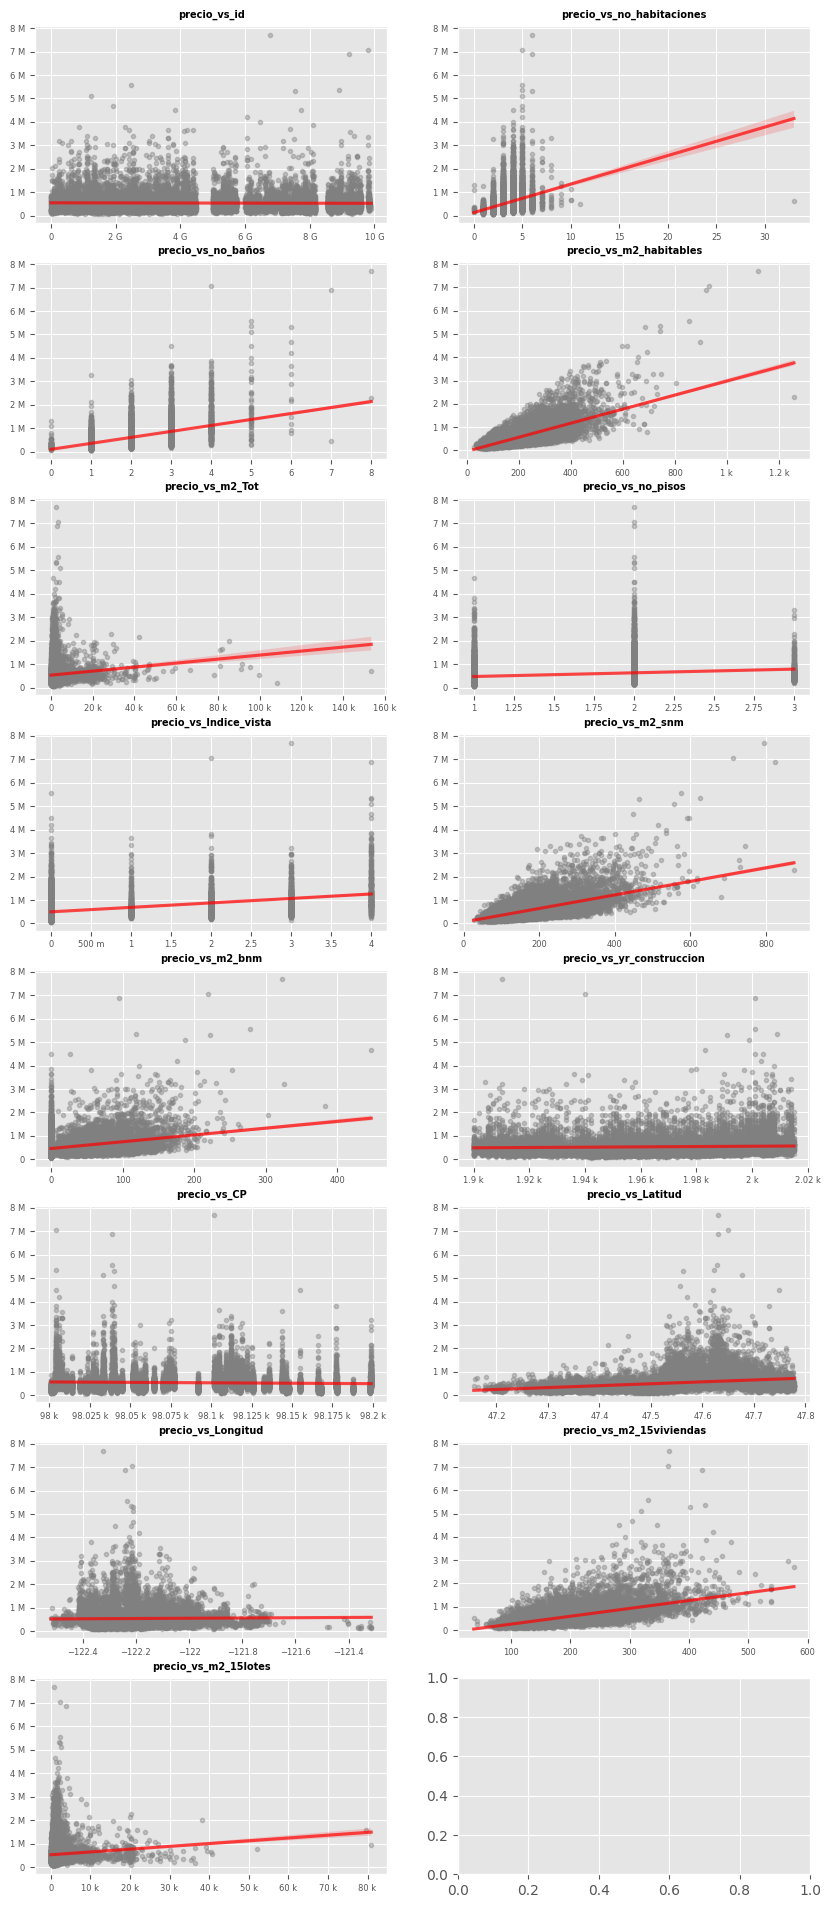

In [41]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(10, 24))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int','int64']).columns
columnas_numeric = columnas_numeric.drop('Precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['Precio'],
        color       = "grey",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title("precio_vs_" + str(colum), fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

Algunos modelos (LM, GLM, ...) se ven perjudicados si incorporan predictores altamente correlacionados. Por esta razón, es conveniente estudiar el grado de correlación entre las variables disponibles.

In [42]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)



corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
132,m2_snm,m2_habitables,0.876597,0.876597
72,m2_habitables,m2_snm,0.876597,0.876597
228,m2_15viviendas,m2_habitables,0.756420,0.756420
78,m2_habitables,m2_15viviendas,0.756420,0.756420
142,m2_snm,m2_15viviendas,0.731870,0.731870
232,m2_15viviendas,m2_snm,0.731870,0.731870
245,m2_15lotes,m2_Tot,0.718557,0.718557
95,m2_Tot,m2_15lotes,0.718557,0.718557
65,m2_habitables,Precio,0.702035,0.702035
20,Precio,m2_habitables,0.702035,0.702035


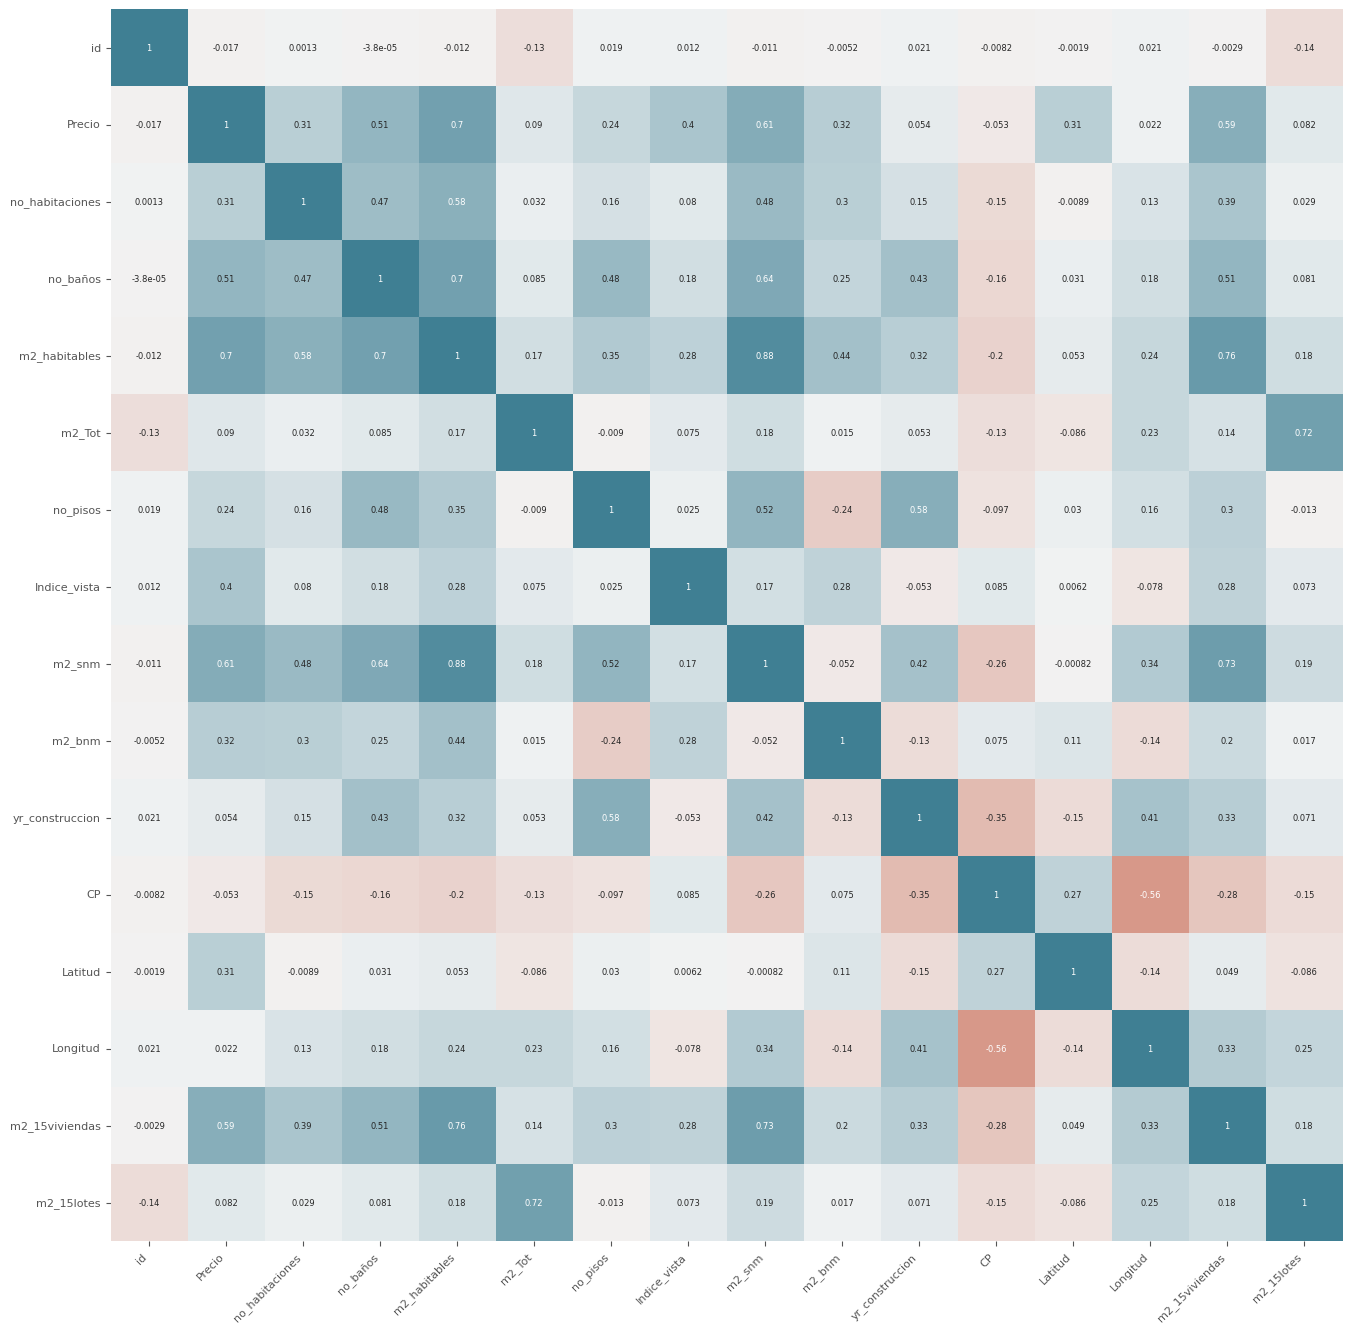

In [43]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 16))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

Variables cualitativas (tipo object)

In [44]:
df.select_dtypes(include=['object']).describe()

,Fecha,Habitacion_baño,Vistaalmar,Condicion,Calidad
count,21613,21613,21613,21613,21613
unique,13,2,2,5,5
top,2015-04,no,No,Buena,Buena
freq,2231,13939,21450,14031,8981


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               21613 non-null  int64  
 1   Fecha            21613 non-null  object 
 2   Precio           21613 non-null  float64
 3   no_habitaciones  21613 non-null  int64  
 4   no_baños         21613 non-null  int64  
 5   Habitacion_baño  21613 non-null  object 
 6   m2_habitables    21613 non-null  float64
 7   m2_Tot           21613 non-null  float64
 8   no_pisos         21613 non-null  int64  
 9   Vistaalmar       21613 non-null  object 
 10  Indice_vista     21613 non-null  int64  
 11  Condicion        21613 non-null  object 
 12  Calidad          21613 non-null  object 
 13  m2_snm           21613 non-null  float64
 14  m2_bnm           21613 non-null  float64
 15  yr_construccion  21613 non-null  int64  
 16  CP               21613 non-null  int64  
 17  Latitud     

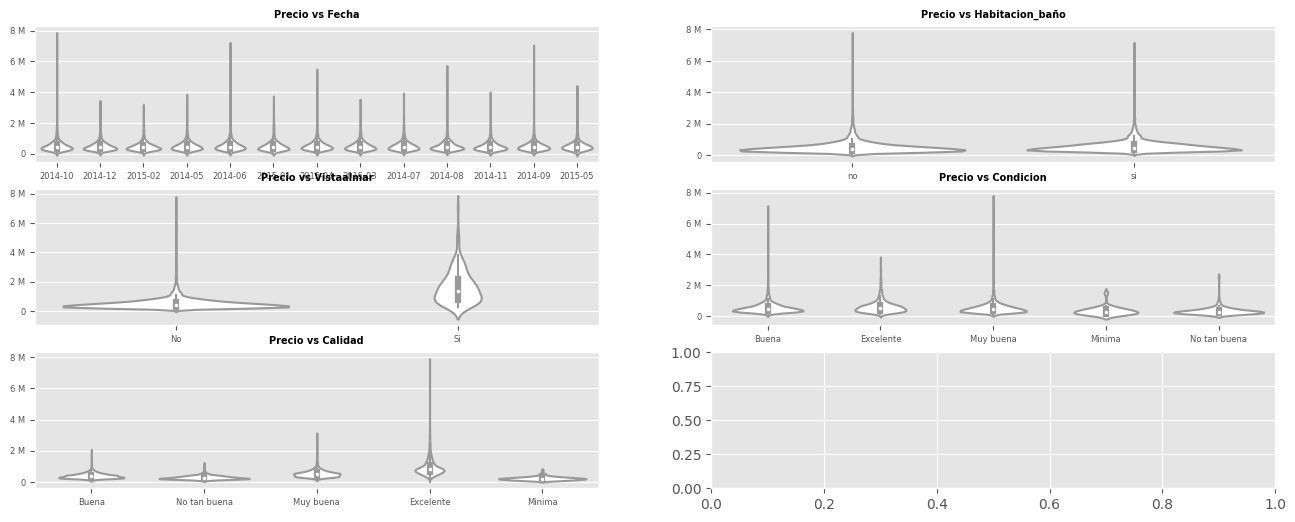

In [46]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 6))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'Precio',
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"Precio vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

In [47]:
df.to_csv('dataframe_Kingscounty.csv', encoding='utf-8')

Division-Train+Test

In [48]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop('Precio', axis = 'columns'),
                                        df['Precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [49]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    1.729000e+04
mean     5.395540e+05
std      3.682358e+05
min      7.500000e+04
25%      3.209000e+05
50%      4.500000e+05
75%      6.430000e+05
max      7.700000e+06
Name: Precio, dtype: float64


In [50]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    4.323000e+03
mean     5.422243e+05
std      3.626938e+05
min      8.000000e+04
25%      3.242250e+05
50%      4.510000e+05
75%      6.498750e+05
max      7.062500e+06
Name: Precio, dtype: float64


In [51]:
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OneHotEncoder, StandardScaler


from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge, Lasso, LinearRegression

In [52]:
# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

In [53]:
# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

In [54]:
# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]
                          )

In [55]:
preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough',
                    verbose_feature_names_out = False
               ).set_output(transform="pandas")

In [56]:
# Pipeline
# ==============================================================================
# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline, para los diferentes modelos.


In [57]:
#Ridge
pipe_Rge = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])
# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe_Rge.fit(X=X_train, y=y_train)

In [58]:
#Lasso
pipe_Lso = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Lasso())])
# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe_Lso.fit(X=X_train, y=y_train)

In [59]:
#LinearRegresion
pipe_LR = Pipeline([('preprocessing', preprocessor),
                 ('modelo', LinearRegression())])
# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe_LR.fit(X=X_train, y=y_train)

In [60]:
#usamos un metodo de validación cruzada

In [61]:
#===================Ridge=========================================

In [62]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold, cross_val_score

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe_Rge,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
            )

#print(f"Métricas de validación cruzada: {cv_scores}")
#print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -206619.14134812102


In [63]:
predicciones_Rge = pipe_Rge.predict(X_test)
df_predicciones_Rge = pd.DataFrame({'precio(test)' : y_test, 'precio(Predicción)' : predicciones_Rge})
df_predicciones_Rge.head(5)

,precio(test),precio(Predicción)
12432,485000.0,447018.114854
7793,358000.0,550441.666898
13435,716500.0,856337.394001
1821,367500.0,415711.355753
12449,544000.0,401939.985743


In [64]:
# mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse_Rge = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones_Rge,
        squared = False
       )
print(rmse_Rge)

199991.2886842547


In [65]:
#===================Lasso=========================================

In [66]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold, cross_val_score

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe_Lso,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
            )

#print(f"Métricas de validación cruzada: {cv_scores}")
#print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -206621.98085453006


In [67]:
predicciones_Lso = pipe_Lso.predict(X_test)
df_predicciones_Lso = pd.DataFrame({'precio(test)' : y_test, 'precio(Predicción)' : predicciones_Lso})
df_predicciones_Lso.head(5)

,precio(test),precio(Predicción)
12432,485000.0,447073.648656
7793,358000.0,550408.824559
13435,716500.0,856346.077361
1821,367500.0,415712.805173
12449,544000.0,401946.374834


In [68]:
# mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse_Lso = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones_Lso,
        squared = False
       )
print(rmse_Lso)

199979.1597572169


In [69]:
#===================LinearRegresion=========================================

In [70]:
# Validación cruzada repetida
# ==============================================================================
from sklearn.model_selection import RepeatedKFold, cross_val_score

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)
cv_scores = cross_val_score(
                estimator = pipe_LR,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = cv
            )

#print(f"Métricas de validación cruzada: {cv_scores}")
#print("")
print(f"Média métricas de validación cruzada: {cv_scores.mean()}")

Média métricas de validación cruzada: -206622.17265694658


In [71]:
predicciones_LR = pipe_LR.predict(X_test)
df_predicciones_LR = pd.DataFrame({'precio(test)' : y_test, 'precio(Predicción)' : predicciones_LR})
df_predicciones_LR.head(5)

,precio(test),precio(Predicción)
12432,485000.0,447086.909097
7793,358000.0,550433.184055
13435,716500.0,856342.425281
1821,367500.0,415706.911195
12449,544000.0,401935.283741


In [72]:
# mean_squared_error de test
# ==============================================================================
from sklearn.metrics import mean_squared_error

rmse_LR = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones_LR,
        squared = False
       )
print(rmse_LR)

199979.0958794302


Hiperparametros

In [73]:
#========================Ridge==========================

In [74]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid_Rge = RandomizedSearchCV(
        estimator  = pipe_Rge,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True,
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid_Rge.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid_Rge.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
10,3.396739,-206496.973591,9384.740383,-205665.916006,2334.383977


In [75]:
#Error de test del modelo final
# ==============================================================================
modelo_final_Rge = grid_Rge.best_estimator_
predicciones_Rge = modelo_final_Rge.predict(X = X_test)
rmse_Rge_ii = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones_Rge,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_Rge_ii}")

El error (rmse) de test es: 200020.9856360326


In [76]:
#========================Lasso==========================

In [77]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid_Lso = RandomizedSearchCV(
        estimator  = pipe_Lso,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True,
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid_Lso.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid_Lso.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.024e+13, tolerance: 1.862e+11
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.947e+13, tolerance: 1.819e+11
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.965e+13, tolerance: 1.854e

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
1,56.690073,-206535.772491,12310.205479,-205641.028126,3127.738758


In [78]:
#Error de test del modelo final
# ==============================================================================
modelo_final_Lso = grid_Lso.best_estimator_
predicciones_Lso = modelo_final_Lso.predict(X = X_test)
rmse_Lso_ii = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones_Lso,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_Lso_ii}")

El error (rmse) de test es: 199984.25031435798


In [79]:
error_modelos = pd.DataFrame({
                        'modelo': ['rmse_LR', 'rmse_Rge', 'rmse_Rge_ii', 'rmse_Lso', 'rmse_Lso_ii'],
                        'rmse': [rmse_LR, rmse_Rge, rmse_Rge_ii, rmse_Lso, rmse_Lso_ii]
                     })
error_modelos = error_modelos.sort_values('rmse', ascending=False)

In [80]:
error_modelos

,modelo,rmse
2,rmse_Rge_ii,200020.985636
1,rmse_Rge,199991.288684
4,rmse_Lso_ii,199984.250314
3,rmse_Lso,199979.159757
0,rmse_LR,199979.095879


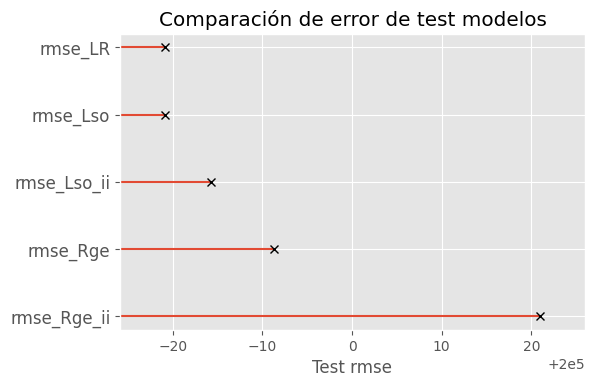

In [81]:
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.hlines(error_modelos.modelo, xmin=0, xmax=error_modelos.rmse)
ax.plot(error_modelos.rmse, error_modelos.modelo,"x", color='black')
ax.tick_params(axis='y', which='major', labelsize=12)
ax.set_xlim([199979.095879-5 ,200020.985636+5 ])
ax.set_title('Comparación de error de test modelos'),
ax.set_xlabel('Test rmse');